In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import time
from sklearn.datasets import load_boston
%matplotlib notebook

In [2]:
df_pendulum = pd.read_csv('SIMPLEPENDULUMOSCILLATIONDATA.txt',header= None,sep = " " , names = ['l','t'])

In [3]:
df_pendulum.head()

l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568

In [5]:
l = df_pendulum['l']
t_sq = df_pendulum['t'] ** 2

In [6]:
def startGradientDescent(y,x,m,c,eta):
    y_calc = m * x + c
    error = (y - y_calc) ** 2
    delta_m = -2 * (y - y_calc) * x
    delta_c = -2 * (y - y_calc)
    m = m - delta_m *eta
    c = c - delta_c *eta
    return m,c,error
def one_loop_random(y, x, m, c, eta):
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    for idx in random_idx:
        m, c, e = startGradientDescent(y[idx],x[idx], m, c, eta)
    return m,c,e
def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(y, x, m, c, eta)
    return m, c, err

In [13]:
def initiatePlotting():
    %matplotlib notebook
    lr = [0.0001,0.001,0.01,0.1,0.2,0.4,0.6,0.8]
    fig = plt.figure(figsize = (15,15))
    index = 1
    for rate in range(1,len(lr)+1):
        m, c = 10,10
        error_list = []
        ax1 = fig.add_subplot(len(lr),2,index)
        ax2 = fig.add_subplot(len(lr),2,index+1)
        index+=2
        plt.ion()
        for num in range(10):
            m, c, error = train_stochastic(l, t_sq, m, c, lr[rate-1], iterations=100)
            # print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
            y = m * l + c
            error_list.append(error)
            ax1.clear()
            ax1.set_xlabel('Length(l)')
            ax1.set_ylabel('T square(t_sq)')
            ax1.plot(l, t_sq, '.k', label ='Actual')
            ax1.plot(l, y, label = 'Predicted')
            ax1.legend()
            ax2.clear()
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Error')
            ax2.plot(range(len(error_list)),error_list,'r--',label= 'Learning rate %f' % lr[rate-1])
            ax2.legend()
            fig.canvas.draw()
            #time.sleep(1)
        plt.ioff()
        plt.savefig('output.png')

<IPython.core.display.Javascript object>


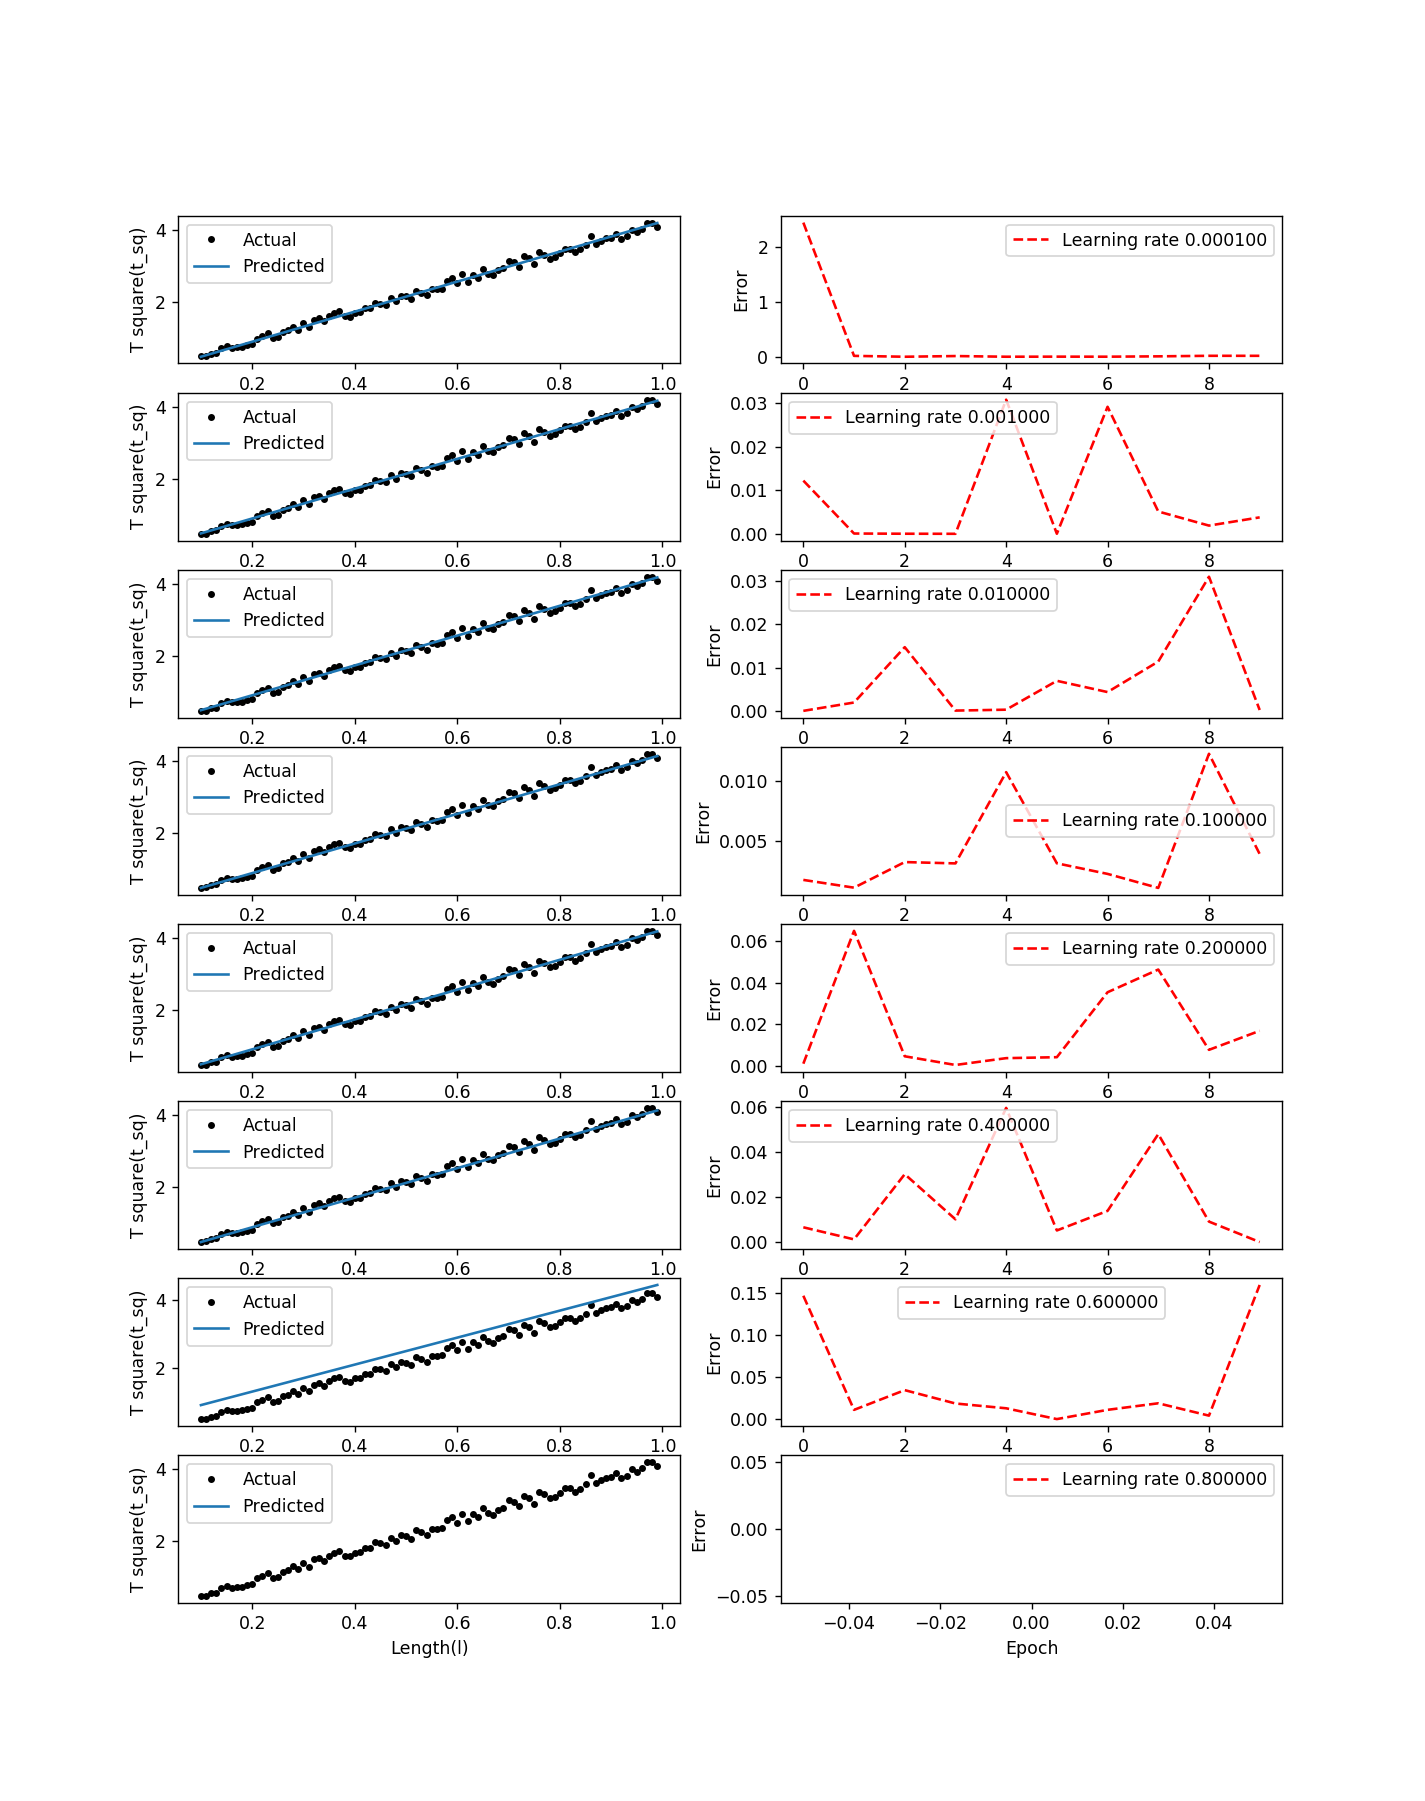

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [14]:
initiatePlotting()
# anim = FuncAnimation(fig, initiatePlotting, frames=range(len(lr)), interval=2000)
# anim.save('line.gif', dpi=80, writer='imagemagick')

In [15]:
dataset = load_boston()
print(len(dataset.target))

506


In [16]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target

NameError: name 'boston' is not defined

In [177]:
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [181]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000